## Day 32 Lecture 2 Assignment

In this assignment, we will learn about SVM. We will use the csection dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ds_useful as ds

In [2]:
# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }

# Target - Caesarian - {0 = No, 1 = Yes }

csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

Our goal is to predict the patient needed a csection.

In [3]:
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


Check whether the data has missing values and remove all rows containing missing values.

In [10]:
# answer below:

def get_categorical_columns(df, unique_thresh=10):
    columns = []
    for col in df.columns:
        if df[col].nunique() < unique_thresh:
            columns.append(col)
    return columns

cat_cols = get_categorical_columns(csection, unique_thresh=5)
print(cat_cols)

ds.missingness_summary(csection, print_log=True)
csection.describe()

['Delivery number', 'Delivery time', 'Blood Pressure', 'Heart Problem', 'Caesarian']
Caesarian          0.0
Heart Problem      0.0
Blood Pressure     0.0
Delivery time      0.0
Delivery number    0.0
Age                0.0
dtype: float64


,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


In [11]:
csection['Age'].unique()

array([22, 26, 28, 27, 32, 36, 33, 23, 20, 29, 25, 37, 24, 18, 30, 40, 31,
       19, 21, 35, 17, 38], dtype=int64)

Examine the distribution of delivery number, blood pressure and heart problem.

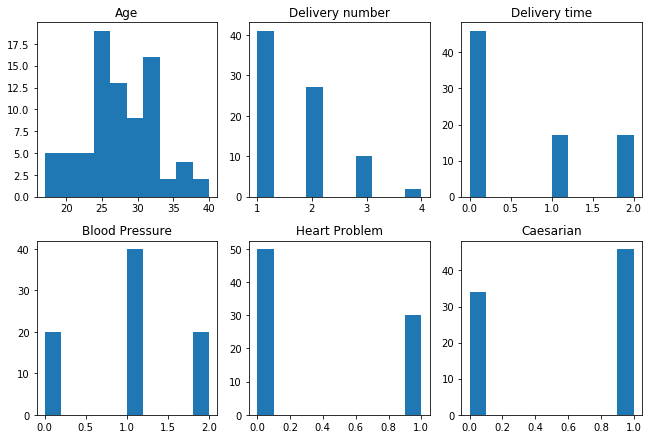

In [15]:
# answer below:
def plot_dist(df, col):
    plt.hist(df[col])

ds.make_subplots(csection, plot_dist)

What are your conclusions from the distribtuions of these variables? Write them below.

In [16]:
# answer below:

print('Most variables, other than Age are actually categorical variables, represented by numbers.')

Most variables, other than age are actually categorical variables, represented by numbers.


Create dummy variables from all columns containing categorical variables with more than two values.

In [21]:
# answer below:
# Get columns that we want to dummify
dum_cols=[]
for col in cat_cols:
    if csection[col].nunique() > 2:
        dum_cols.append(col)

# Make dum_col columns object type for ease of dummifying
csection[dum_cols] = csection[dum_cols].astype('object')

# Dummify Columns
dums = pd.get_dummies(csection[dum_cols], drop_first=True)
dums.head()

,Delivery number_2,Delivery number_3,Delivery number_4,Delivery time_1,Delivery time_2,Blood Pressure_1,Blood Pressure_2
0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0
2,1,0,0,1,0,1,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0


In [23]:
csec_feat = pd.concat([dums, csection.drop(dum_cols, axis=1)], axis=1)
csec_feat.head()

,Delivery number_2,Delivery number_3,Delivery number_4,Delivery time_1,Delivery time_2,Blood Pressure_1,Blood Pressure_2,Age,Heart Problem,Caesarian
0,0,0,0,0,0,0,1,22,0,0
1,1,0,0,0,0,1,0,26,0,1
2,1,0,0,1,0,1,0,26,0,0
3,0,0,0,0,0,0,1,28,0,0
4,1,0,0,0,0,1,0,22,0,1


Split the data into test and train with test containing 20% of the data.

In [24]:
# answer below:
from sklearn.model_selection import train_test_split

X = csec_feat.drop('Caesarian', axis=1)
Y = csec_feat['Caesarian']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

Use the linear kernel to train a SVC model on our training data. Report the score for the test data.

In [25]:
# answer below:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

svm.score(X_test, Y_test)

0.8125